# Reports of spontaneous suspected Adverse Drug Reactions (ADRs) reported to the UK's MHRA Yellow Card Scheme 

#### This notebook visualises the data openly available at Yellow Card [here](https://info.mhra.gov.uk/drug-analysis-profiles/dap.html?drug=./UK_EXTERNAL/NONCOMBINED/UK_NON_000129175942.zip&agency=MHRA) which was extracted on Monday, November 23 2020. 

In [1]:
# import libraries required for analysis 
import numpy as np 
import pandas as pd
from pylab import savefig
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data 
df = pd.read_csv("data.csv",thousands=',')

In [3]:
df.head()

,ID,SEX,YEAR,SEVERITY,PT_1,HLT_1,HLGT_1,SOC_ABBREV_1,FATAL_YN_1,PT_2,...,PT_36,HLT_36,HLGT_36,SOC_ABBREV_36,FATAL_YN_36,PT_37,HLT_37,HLGT_37,SOC_ABBREV_37,FATAL_YN_37
0,22,Female,1994,S,Bronchospasm,Bronchospasm and obstruction,Bronchial disorders (excl neoplasms),Resp,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63,Male,1991,S,Injection site necrosis,Injection site reactions,Administration site reactions,Genrl,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96,Male,1995,N,Dizziness,Neurological signs and symptoms NEC,Neurological disorders NEC,Nerv,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,111,Male,1991,S,Injection site necrosis,Injection site reactions,Administration site reactions,Genrl,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,114,Female,1991,N,Tinnitus,Inner ear signs and symptoms,Inner ear and VIIIth cranial nerve disorders,Ear,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,ID,YEAR
count,155.000000,155.000000
mean,5194.290323,2001.896774
std,2918.207451,9.857540
min,22.000000,1979.000000
25%,2326.000000,1994.000000
50%,6200.000000,2002.000000
75%,7703.500000,2009.000000
max,8916.000000,2020.000000


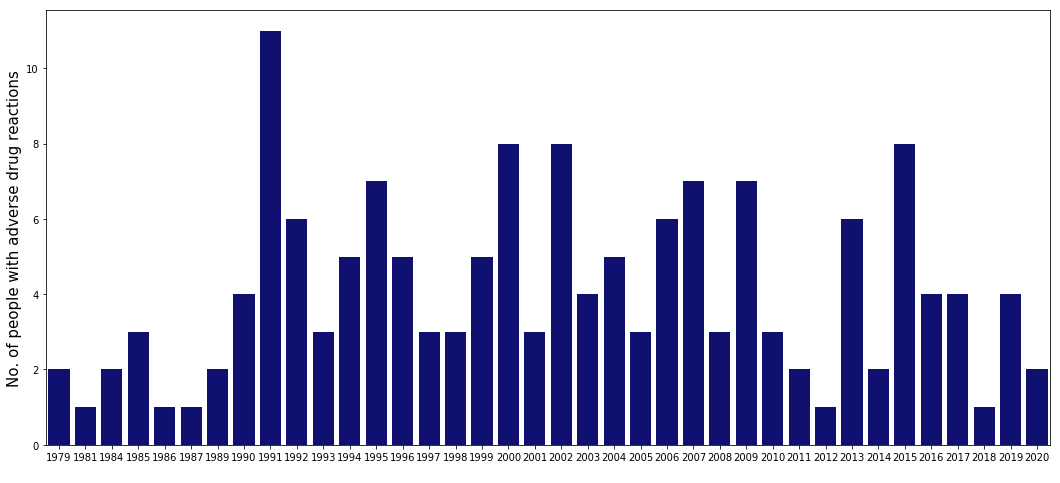

In [18]:
# plotting the number of cases overtime using seaborn

plt.figure(figsize=(18,8))
ax = sns.countplot(data=df, x="YEAR", color="navy")
plt.xlabel(' ')
plt.ylabel('No. of people with adverse drug reactions', fontsize=15)

plt.savefig("fig1_cases_time.png", dpi=600)

In [19]:
df['SEX'].value_counts()

Female     77
Male       73
Unknown     5
Name: SEX, dtype: int64

In [20]:
df['SEVERITY'].value_counts()

S    115
N     33
F      7
Name: SEVERITY, dtype: int64

In [21]:
def rel_freq(x):
    freqs = [(value, x.count(value) / len(x)) for value in set(x)] 
    return freqs

rel_freq(list(df['SEVERITY']))

[('F', 0.04516129032258064),
 ('N', 0.2129032258064516),
 ('S', 0.7419354838709677)]

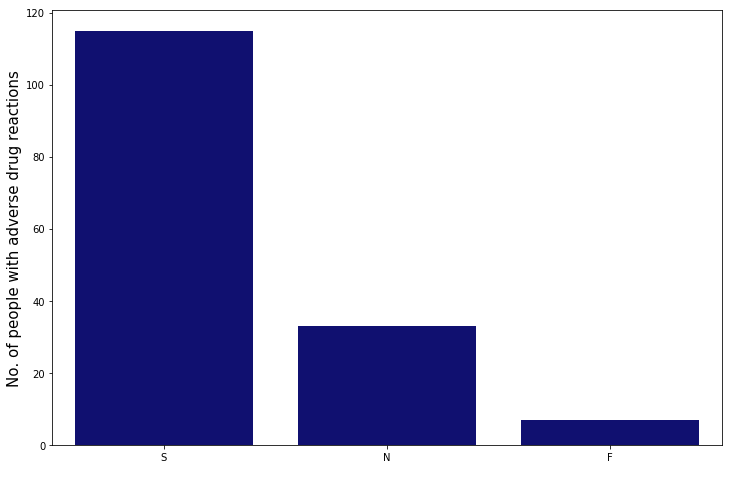

In [22]:
# plotting the severity of cases using seaborn 

plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x="SEVERITY", color="navy")
plt.xlabel(' ')
plt.ylabel('No. of people with adverse drug reactions', fontsize=15)

plt.savefig("fig2_severity.png", dpi=600)

In [23]:
year_severity = pd.crosstab(index=df["YEAR"], columns=df["SEVERITY"])
year_severity

SEVERITY,F,N,S
YEAR,,,
1979,0,1,1
1981,0,1,0
1984,0,2,0
1985,0,1,2
1986,0,1,0
1987,0,1,0
1989,0,1,1
1990,0,3,1
1991,0,3,8


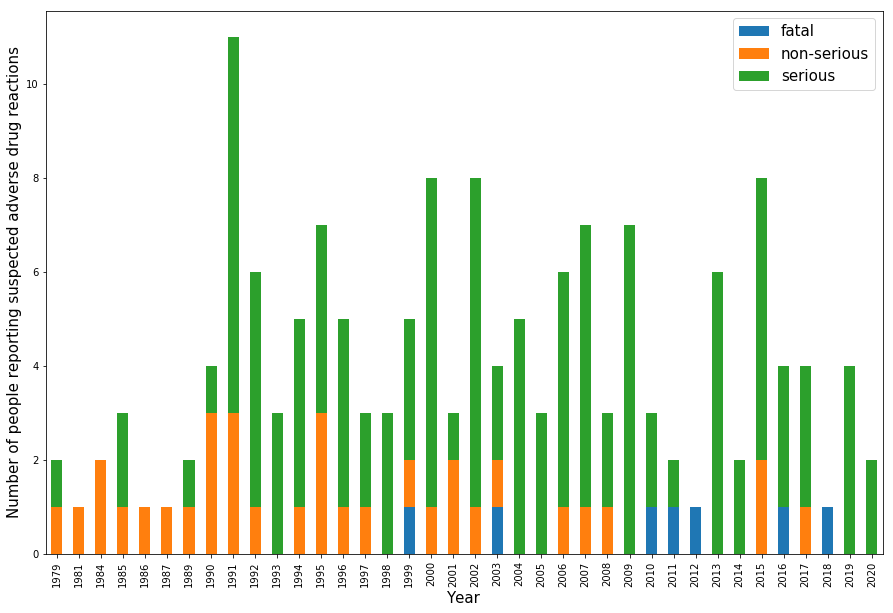

In [25]:
ax = df.groupby(['SEVERITY', 'YEAR']).size().reset_index().pivot(columns='SEVERITY', index='YEAR', values=0)
ax.plot.bar(stacked=True, figsize=(15,10))

plt.ylabel('Number of people reporting suspected adverse drug reactions', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.legend(["fatal", "non-serious", "serious"], fontsize=15)

plt.savefig("fig3_severity_year.png", dpi=600)

In [26]:
df_long = pd.wide_to_long(df, stubnames=['PT', 'HLT', 'HLGT', 'SOC_ABBREV', 'FATAL_YN'],
i=['ID','SEX','YEAR','SEVERITY'],
j='ADVERSE_EVENT',
sep='_')

df_long = df_long.reset_index()
df_long = df_long.dropna(subset=['PT', 'HLT', 'HLGT', 'SOC_ABBREV', 'FATAL_YN'])

In [27]:
df_long.tail()

,ID,SEX,YEAR,SEVERITY,ADVERSE_EVENT,PT,HLT,HLGT,SOC_ABBREV,FATAL_YN
5704,8916,Male,2020,S,7,Megacolon,Non-mechanical ileus,Gastrointestinal motility and defaecation cond...,Gastr,N
5705,8916,Male,2020,S,8,Pain,Pain and discomfort NEC,General system disorders NEC,Genrl,N
5706,8916,Male,2020,S,9,Pallor,Site specific vascular disorders NEC,Vascular disorders NEC,Vasc,N
5707,8916,Male,2020,S,10,Pallor,Site specific vascular disorders NEC,Vascular disorders NEC,Vasc,N
5708,8916,Male,2020,S,11,Rectal haemorrhage,Intestinal haemorrhages,Gastrointestinal haemorrhages NEC,Gastr,N


In [28]:
df_long.describe()

,ID,YEAR,ADVERSE_EVENT
count,415.000000,415.000000,415.000000
mean,6550.057831,2006.481928,4.631325
std,2451.540064,9.395704,6.353247
min,22.000000,1979.000000,1.000000
25%,5839.000000,2000.000000,1.000000
50%,7575.000000,2009.000000,2.000000
75%,8116.000000,2013.000000,5.000000
max,8916.000000,2020.000000,37.000000


In [29]:
df_long['SOC_ABBREV'].value_counts()

Gastr    85
Genrl    40
Inv      32
Skin     32
Resp     30
Psych    29
Nerv     29
Renal    25
Inj&P    18
Metab    17
Infec    13
Vasc     13
Hepat    12
Card      7
Repro     6
Eye       5
Musc      5
Immun     4
Surg      4
Cong      2
Neopl     2
Ear       2
SocCi     1
Blood     1
Endo      1
Name: SOC_ABBREV, dtype: int64

In [30]:
rel_freq(list(df_long['SOC_ABBREV']))

[('Nerv', 0.06987951807228916),
 ('Repro', 0.014457831325301205),
 ('Blood', 0.0024096385542168677),
 ('Inj&P', 0.043373493975903614),
 ('Eye', 0.012048192771084338),
 ('Infec', 0.03132530120481928),
 ('Endo', 0.0024096385542168677),
 ('Ear', 0.004819277108433735),
 ('Hepat', 0.02891566265060241),
 ('Genrl', 0.0963855421686747),
 ('Metab', 0.04096385542168675),
 ('Gastr', 0.20481927710843373),
 ('Vasc', 0.03132530120481928),
 ('Psych', 0.06987951807228916),
 ('Immun', 0.00963855421686747),
 ('Card', 0.016867469879518072),
 ('Skin', 0.07710843373493977),
 ('Neopl', 0.004819277108433735),
 ('Inv', 0.07710843373493977),
 ('SocCi', 0.0024096385542168677),
 ('Cong', 0.004819277108433735),
 ('Resp', 0.07228915662650602),
 ('Surg', 0.00963855421686747),
 ('Renal', 0.060240963855421686),
 ('Musc', 0.012048192771084338)]

In [31]:
ADR = pd.crosstab(index=df_long["SOC_ABBREV"], columns=df_long["SEVERITY"])
ADR

SEVERITY,F,N,S
SOC_ABBREV,,,
Blood,0,0,1
Card,5,0,2
Cong,1,0,1
Ear,0,1,1
Endo,0,0,1
Eye,0,0,5
Gastr,6,8,71
Genrl,3,5,32
Hepat,7,0,5


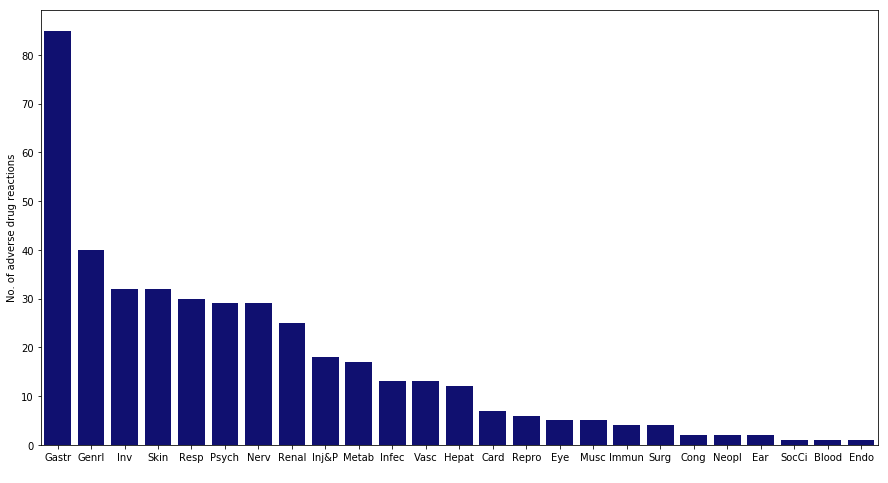

In [32]:
# plotting the number of adverse drug reactions using seaborn

plt.figure(figsize=(15,8))
ax = sns.countplot(data=df_long, 
                   x="SOC_ABBREV", 
                   color="navy", 
                   order=df_long['SOC_ABBREV'].value_counts().index)
plt.xlabel(' ')
plt.ylabel('No. of adverse drug reactions')

plt.savefig("fig4_system.png", dpi=600)

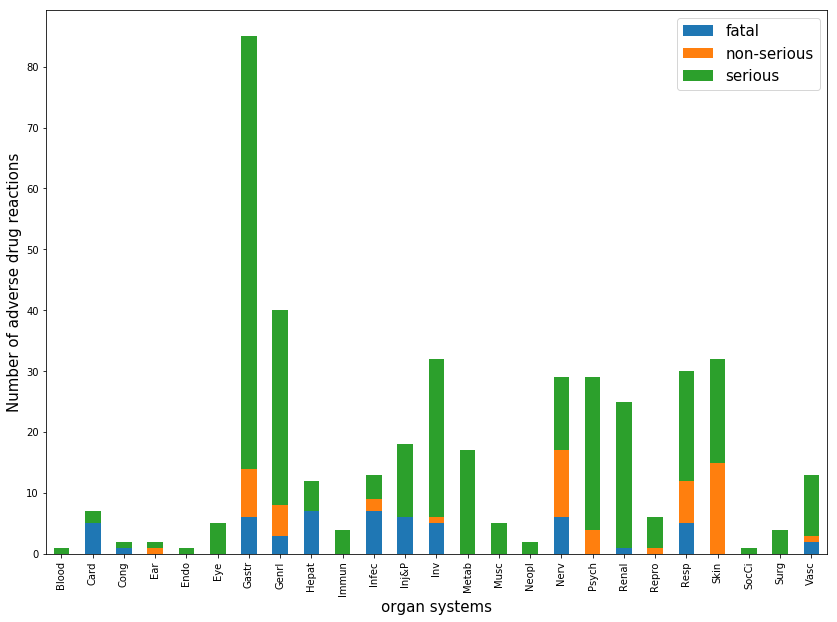

In [33]:
ax = df_long.sort_values('SOC_ABBREV', ascending=False).groupby(['SEVERITY', 'SOC_ABBREV']).size().reset_index().pivot(columns='SEVERITY', index='SOC_ABBREV', values=0)
ax.plot.bar(stacked=True, figsize=(14,10))

plt.xlabel('organ systems', fontsize=15)
plt.ylabel('Number of adverse drug reactions', fontsize=15)
plt.legend(["fatal", "non-serious", "serious"], fontsize=15)

plt.savefig("fig5_severity_year.png", dpi=600)